<a href="https://colab.research.google.com/github/RenukaSiriwardhana/Skin-Cancer-Detection--DermaVision/blob/main/notebooks/implementation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip -q install kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/DermaVision/kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API configured...")

Kaggle API configured...


In [3]:
import os

DRIVE_ZIP_PATH = "/content/drive/MyDrive/DermaVision/dataset_cache/ham10000-split-and-augmented.zip"
EXTRACT_PATH = "/content/ham10000_dataset"

os.makedirs("/content/drive/MyDrive/DermaVision/dataset_cache", exist_ok=True)

if not os.path.exists(DRIVE_ZIP_PATH):
    print("Downloading dataset from Kaggle (one time only)...")
    !kaggle datasets download -d ahefatresearch/ham10000-split-and-augmented -p /content --force
    !cp /content/ham10000-split-and-augmented.zip "{DRIVE_ZIP_PATH}"
    print("Dataset zip saved to Drive ")
else:
    print("Dataset already exists in Drive (Skipping download)")

Dataset URL: https://www.kaggle.com/datasets/ahefatresearch/ham10000-split-and-augmented
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 99% 2.85G/2.87G [00:25<00:00, 127MB/s]
100% 2.87G/2.87G [00:25<00:00, 120MB/s]
Dataset zip saved to Drive 


In [4]:
!rm -rf "{EXTRACT_PATH}"
!unzip -q "{DRIVE_ZIP_PATH}" -d "{EXTRACT_PATH}"

print("Extracted dataset folders:")
!ls "{EXTRACT_PATH}"

Extracted dataset folders:
test_dir  train_dir  val_dir


In [5]:
import os

BASE_DIR = "/content/ham10000_dataset"
TRAIN_DIR = os.path.join(BASE_DIR, "train_dir")
TEST_DIR  = os.path.join(BASE_DIR, "test_dir")

print("Train exists:", os.path.exists(TRAIN_DIR))
print("Test exists :", os.path.exists(TEST_DIR))

train_classes = sorted(os.listdir(TRAIN_DIR))
test_classes  = sorted(os.listdir(TEST_DIR))

print("Train classes:", train_classes)
print("Test classes :", test_classes)
print("Number of classes:", len(train_classes))

Train exists: True
Test exists : True
Train classes: ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
Test classes : ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
Number of classes: 7


In [6]:
def count_images_per_class(folder):
    counts = {}
    for cls in sorted(os.listdir(folder)):
        cls_path = os.path.join(folder, cls)
        if os.path.isdir(cls_path):
            imgs = [f for f in os.listdir(cls_path) if f.lower().endswith((".jpg",".png",".jpeg"))]
            counts[cls] = len(imgs)
    return counts

train_counts = count_images_per_class(TRAIN_DIR)
test_counts  = count_images_per_class(TEST_DIR)

print("\nTrain counts per class:")
for k, v in train_counts.items():
    print(f"{k}: {v}")

print("\nTest counts per class:")
for k, v in test_counts.items():
    print(f"{k}: {v}")

print("\nTotal train images:", sum(train_counts.values()))
print("Total test images :", sum(test_counts.values()))
print("Total images:", sum(train_counts.values()) + sum(test_counts.values()))


Train counts per class:
akiec: 7854
bcc: 7965
bkl: 7944
df: 7377
mel: 7932
nv: 8004
vasc: 7706

Test counts per class:
akiec: 22
bcc: 27
bkl: 66
df: 6
mel: 35
nv: 663
vasc: 9

Total train images: 54782
Total test images : 828
Total images: 55610


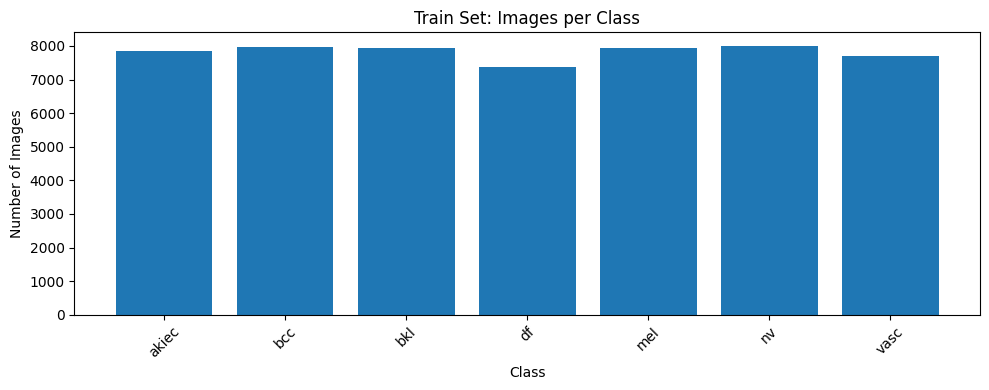

In [7]:
import matplotlib.pyplot as plt

classes = list(train_counts.keys())
values  = list(train_counts.values())

plt.figure(figsize=(10,4))
plt.bar(classes, values)
plt.title("Train Set: Images per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

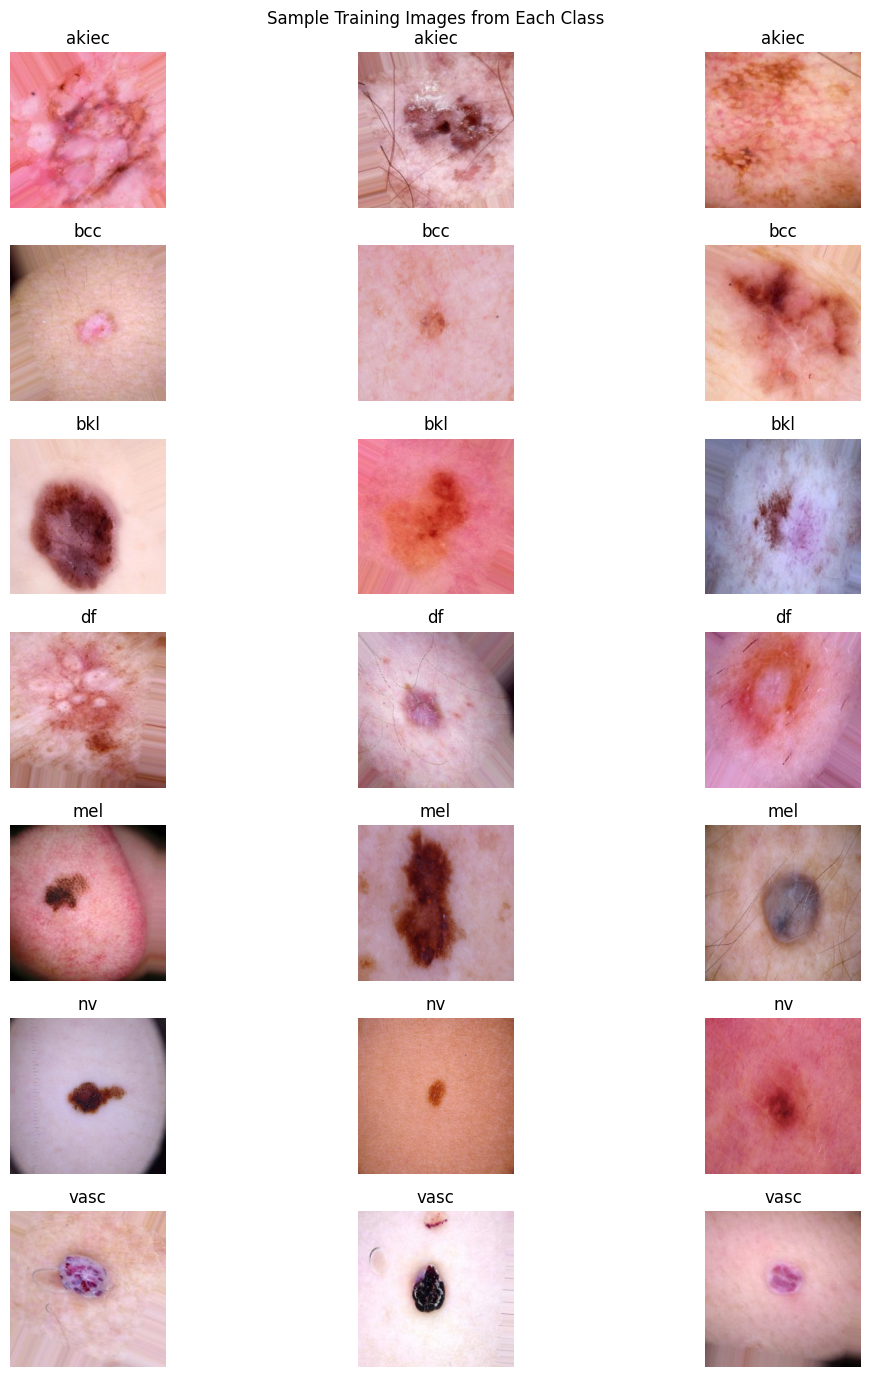

In [8]:
from tensorflow.keras.preprocessing.image import load_img

def show_samples(folder, per_class=3, img_size=(224,224)):
    classes = sorted(os.listdir(folder))
    plt.figure(figsize=(12, 2*len(classes)))
    plot_i = 1

    for cls in classes:
        cls_path = os.path.join(folder, cls)
        imgs = [f for f in os.listdir(cls_path) if f.lower().endswith((".jpg",".png",".jpeg"))][:per_class]

        for img_name in imgs:
            img_path = os.path.join(cls_path, img_name)
            img = load_img(img_path, target_size=img_size)

            plt.subplot(len(classes), per_class, plot_i)
            plt.imshow(img)
            plt.title(cls)
            plt.axis("off")
            plot_i += 1

    plt.suptitle("Sample Training Images from Each Class")
    plt.tight_layout()
    plt.show()

show_samples(TRAIN_DIR, per_class=3)